# LSTM MODEL RK PURAM

In [ ]:
import pandas as pd
from sklearn import preprocessing 
df = pd.read_excel (r'C:/Users/Kira/Desktop/Internship/Data/Delhi_Data-20210529T043217Z-001/Delhi_Data/RK_PURAM_MONTHLY_DATA.xlsx')
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [3]:
import tensorflow as tf

In [4]:
df = df.set_index('From Date')

In [5]:
df.columns

Index(['PM2.5', 'PM1', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'CO', 'Ozone'], dtype='object')

<AxesSubplot:xlabel='From Date'>

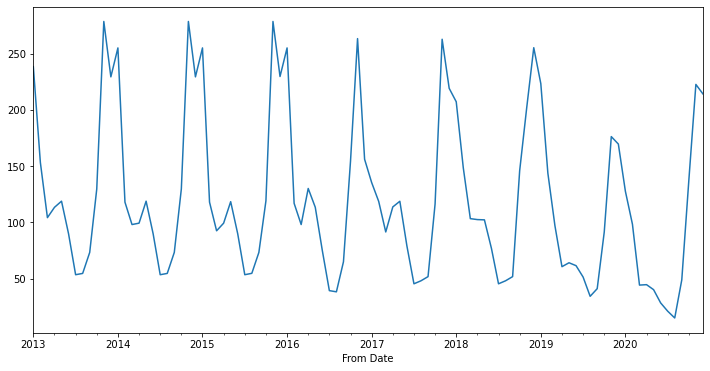

In [6]:
df['PM2.5'].plot(figsize=(12,6))

In [7]:
len(df['PM2.5'])

96

In [8]:
train = pd.DataFrame(df['PM2.5'].iloc[:72])
test = pd.DataFrame(df['PM2.5'].iloc[72:84])

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [10]:
scaler.fit(train)
scaled_train = train
scaled_test = test

In [11]:
scaled_train

,PM2.5
From Date,
2013-01-31,238.402581
2013-02-28,153.191071
2013-03-31,104.222419
2013-04-30,113.373167
2013-05-31,118.867419
...,...
2018-08-31,48.106129
2018-09-30,51.802667
2018-10-31,145.899032


In [12]:

from keras.preprocessing.sequence import TimeseriesGenerator

In [13]:
import numpy as np

In [14]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [15]:
n_input = 12
n_features = 1
generator = tf.keras.preprocessing.sequence.TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [16]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.83286754 0.47819652 0.27437708 0.31246472 0.33533313 0.21444736
 0.06327952 0.06804193 0.14573983 0.38049884 1.         0.79510123]
Predict this y: 
 [[0.90214472]]


In [17]:
X.shape


(1, 12, 1)

In [18]:
# define model
model = Sequential()
model.add(LSTM(250, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [19]:

# fit model
model.fit(generator,epochs=78)

Epoch 1/78
60/60 [==============================] - 3s 10ms/step - loss: 0.1085
Epoch 2/78
60/60 [==============================] - 1s 9ms/step - loss: 0.0816
Epoch 3/78
60/60 [==============================] - 0s 7ms/step - loss: 0.0806
Epoch 4/78
60/60 [==============================] - 1s 8ms/step - loss: 0.0638
Epoch 5/78
60/60 [==============================] - 1s 9ms/step - loss: 0.0712
Epoch 6/78
60/60 [==============================] - 1s 11ms/step - loss: 0.0373
Epoch 7/78
60/60 [==============================] - 1s 14ms/step - loss: 0.0220
Epoch 8/78
60/60 [==============================] - 1s 12ms/step - loss: 0.0246
Epoch 9/78
60/60 [==============================] - 1s 10ms/step - loss: 0.0249
Epoch 10/78
60/60 [==============================] - 1s 13ms/step - loss: 0.0193
Epoch 11/78
60/60 [==============================] - 1s 12ms/step - loss: 0.0201
Epoch 12/78
60/60 [==============================] - 1s 9ms/step - loss: 0.0226
Epoch 13/78
60/60 [=======================

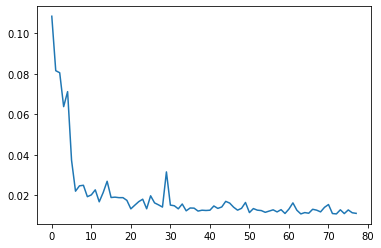

In [20]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [21]:

last_train_batch = scaled_train[-12:]

In [22]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [23]:
model.predict(last_train_batch)

array([[0.69972914]], dtype=float32)

In [24]:
scaled_test[0]

array([0.77005661])

In [25]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [26]:
test_predictions

[array([0.69972914], dtype=float32),
 array([0.46332023], dtype=float32),
 array([0.30722213], dtype=float32),
 array([0.24634674], dtype=float32),
 array([0.214459], dtype=float32),
 array([0.10178516], dtype=float32),
 array([-0.00819851], dtype=float32),
 array([0.00997329], dtype=float32),
 array([0.0473429], dtype=float32),
 array([0.487883], dtype=float32),
 array([0.7425119], dtype=float32),
 array([0.877795], dtype=float32)]

In [27]:
scaled_test

array([[ 0.77005661],
       [ 0.43907887],
       [ 0.24499165],
       [ 0.09298201],
       [ 0.10748926],
       [ 0.0966975 ],
       [ 0.05466234],
       [-0.01662212],
       [ 0.01162958],
       [ 0.2210903 ],
       [ 0.57410263],
       [ 0.54660188]])

In [28]:

true_predictions = scaler.inverse_transform(test_predictions)

In [29]:
true_predictions

array([[206.41540626],
       [149.61696615],
       [112.11360765],
       [ 97.48798786],
       [ 89.82679685],
       [ 62.75633581],
       [ 36.33220083],
       [ 40.69806834],
       [ 49.67630702],
       [155.5182975 ],
       [216.69418667],
       [249.19662528]])

In [30]:
test['Predictions'] = true_predictions

In [31]:
test

,PM2.5,Predictions
From Date,,
2019-01-31,223.311935,206.415406
2019-02-28,143.792857,149.616966
2019-03-31,97.162419,112.113608
2019-04-30,60.641333,97.487988
2019-05-31,64.126774,89.826797
2019-06-30,61.534000,62.756336
2019-07-31,51.434839,36.332201
2019-08-31,34.308387,40.698068
2019-09-30,41.096000,49.676307


<AxesSubplot:xlabel='From Date'>

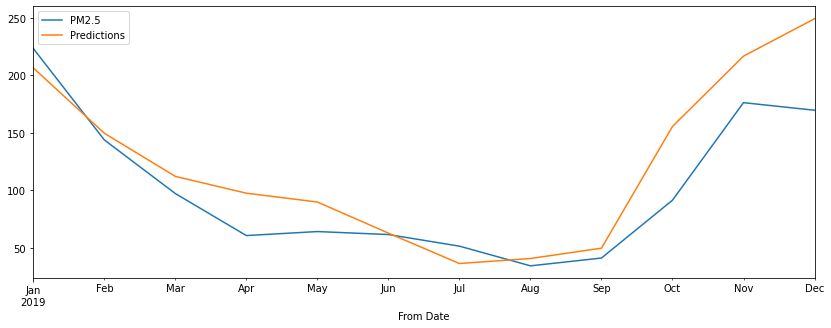

In [32]:
test.plot(figsize=(14,5))


In [33]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['PM2.5'],test['Predictions']))
print(rmse)

35.334551243888846


# PM10

<AxesSubplot:xlabel='From Date'>

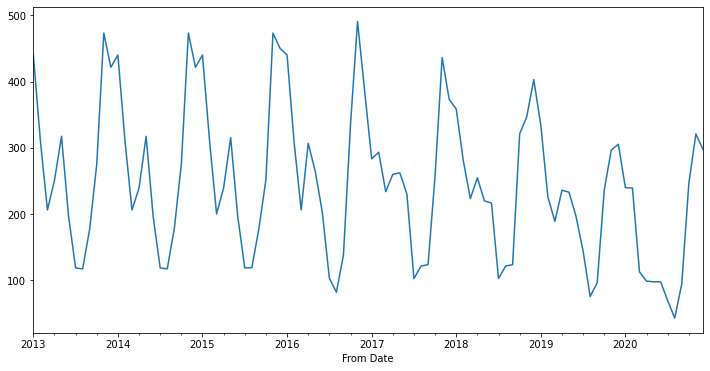

In [34]:
df['PM1'].plot(figsize=(12,6))

In [35]:
len(df['PM1'])

96

In [36]:
train_PM10 = pd.DataFrame(df['PM1'].iloc[:72])
test_PM10 = pd.DataFrame(df['PM1'].iloc[72:84])

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [38]:
scaler.fit(train)
scaled_train_PM10 = train_PM10
scaled_test_PM10 = test_PM10

In [39]:
scaled_train_PM10

,PM1
From Date,
2013-01-31,440.016129
2013-02-28,310.870357
2013-03-31,206.323871
2013-04-30,251.067667
2013-05-31,317.449355
...,...
2018-08-31,121.732903
2018-09-30,123.900333
2018-10-31,321.148065


In [40]:

from keras.preprocessing.sequence import TimeseriesGenerator

In [41]:
import numpy as np

In [42]:
scaler.fit(train_PM10)
scaled_train_PM10 = scaler.transform(train_PM10)
scaled_test_PM10 = scaler.transform(test_PM10)

In [43]:
n_input = 12
n_features = 1
generator = tf.keras.preprocessing.sequence.TimeseriesGenerator(scaled_train_PM10, scaled_train_PM10, length=n_input, batch_size=1)

In [44]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.87619482 0.55984285 0.30374861 0.4133518  0.57595858 0.28053024
 0.08965121 0.0862305  0.23447501 0.47258898 0.95720433 0.8307426 ]
Predict this y: 
 [[0.87619482]]


In [45]:
X.shape


(1, 12, 1)

In [46]:
# define model
model_PM10 = Sequential()
model_PM10.add(LSTM(250, activation='relu', input_shape=(n_input, n_features)))
model_PM10.add(Dense(1))
model_PM10.compile(optimizer='adam', loss='mse')

In [47]:

# fit model
model_PM10.fit(generator,epochs=65)

Epoch 1/65
60/60 [==============================] - 2s 11ms/step - loss: 0.0944
Epoch 2/65
60/60 [==============================] - 1s 13ms/step - loss: 0.0675
Epoch 3/65
60/60 [==============================] - 0s 8ms/step - loss: 0.0548
Epoch 4/65
60/60 [==============================] - 1s 13ms/step - loss: 0.0285
Epoch 5/65
60/60 [==============================] - 1s 13ms/step - loss: 0.0207
Epoch 6/65
60/60 [==============================] - 1s 13ms/step - loss: 0.0964
Epoch 7/65
60/60 [==============================] - 1s 9ms/step - loss: 0.0519
Epoch 8/65
60/60 [==============================] - 0s 6ms/step - loss: 0.0206
Epoch 9/65
60/60 [==============================] - 0s 7ms/step - loss: 0.0224
Epoch 10/65
60/60 [==============================] - 0s 7ms/step - loss: 0.0189
Epoch 11/65
60/60 [==============================] - 1s 9ms/step - loss: 0.0208
Epoch 12/65
60/60 [==============================] - 0s 6ms/step - loss: 0.0124
Epoch 13/65
60/60 [=========================

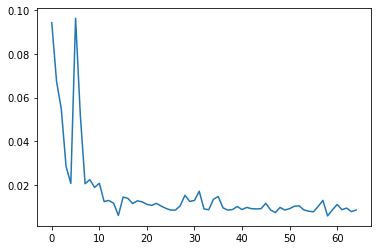

In [48]:
loss_per_epoch = model_PM10.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [49]:

last_train_batch_PM10 = scaled_train_PM10[-12:]

In [50]:
last_train_batch_PM10 = last_train_batch_PM10.reshape((1, n_input, n_features))

In [51]:
model_PM10.predict(last_train_batch_PM10)

array([[0.62539554]], dtype=float32)

In [52]:
scaled_test_PM10[0]

array([0.61719936])

In [53]:
test_predictions_PM10 = []

first_eval_batch_PM10 = scaled_train_PM10[-n_input:]
current_batch_PM10 = first_eval_batch_PM10.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred_PM10 = model_PM10.predict(current_batch_PM10)[0]
    
    # append the prediction into the array
    test_predictions_PM10.append(current_pred_PM10) 
    
    # use the prediction to update the batch and remove the first value
    current_batch_PM10 = np.append(current_batch_PM10[:,1:,:],[[current_pred_PM10]],axis=1)

In [54]:
test_predictions_PM10

[array([0.62539554], dtype=float32),
 array([0.48686582], dtype=float32),
 array([0.38187382], dtype=float32),
 array([0.40982178], dtype=float32),
 array([0.34615815], dtype=float32),
 array([0.32945678], dtype=float32),
 array([0.07604305], dtype=float32),
 array([0.07678683], dtype=float32),
 array([0.08090171], dtype=float32),
 array([0.51309514], dtype=float32),
 array([0.618085], dtype=float32),
 array([0.69010496], dtype=float32)]

In [55]:
scaled_test_PM10

array([[ 0.61719936],
       [ 0.35219404],
       [ 0.26156894],
       [ 0.37664822],
       [ 0.36943351],
       [ 0.27991622],
       [ 0.15213507],
       [-0.01589299],
       [ 0.03481278],
       [ 0.37773361],
       [ 0.52497067],
       [ 0.54656134]])

In [56]:
true_predictions_PM10 = scaler.inverse_transform(test_predictions_PM10)

In [57]:
true_predictions_PM10

array([[337.63122293],
       [281.078621  ],
       [238.21726966],
       [249.62659042],
       [223.63690334],
       [216.8188287 ],
       [113.36661658],
       [113.67025483],
       [115.35009104],
       [291.78633358],
       [334.6468211 ],
       [364.04783886]])

In [58]:
test_PM10['Predictions'] = true_predictions_PM10

In [59]:
test_PM10

,PM1,Predictions
From Date,,
2019-01-31,334.285261,337.631223
2019-02-28,226.100962,281.078621
2019-03-31,189.104677,238.217270
2019-04-30,236.084000,249.626590
2019-05-31,233.138710,223.636903
2019-06-30,196.594667,216.818829
2019-07-31,144.430000,113.366617
2019-08-31,75.835161,113.670255
2019-09-30,96.535000,115.350091


<AxesSubplot:xlabel='From Date'>

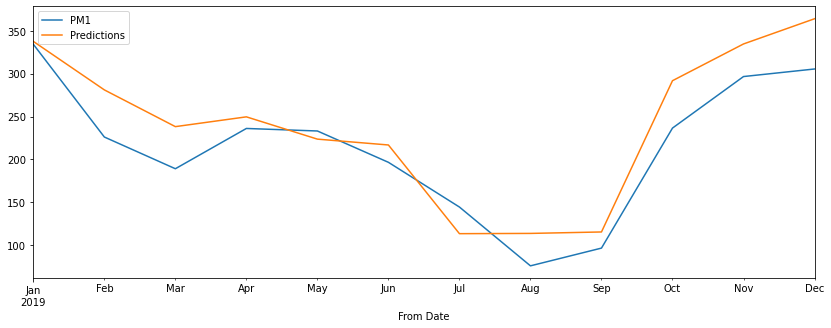

In [60]:
test_PM10.plot(figsize=(14,5))


In [61]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_PM10=sqrt(mean_squared_error(test_PM10['PM1'],test_PM10['Predictions']))
print(rmse_PM10)

37.42921318785595


In [62]:
train_PM10.mean()

PM1    265.483219
dtype: float64

In [63]:
np.sqrt(test_PM10.var())

PM1            79.668245
Predictions    88.769776
dtype: float64

# NO

<AxesSubplot:xlabel='From Date'>

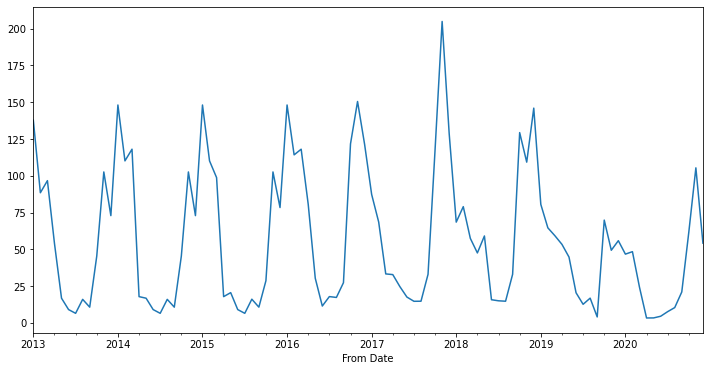

In [92]:
df['NO'].plot(figsize=(12,6))

In [93]:
len(df['NO'])

96

In [94]:
train_NO = pd.DataFrame(df['NO'].iloc[:72])
test_NO = pd.DataFrame(df['NO'].iloc[72:84])

In [95]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [96]:
scaler.fit(train_NO)
scaled_train_NO = train_NO
scaled_test_NO = test_NO

In [97]:
scaled_train_NO

,NO
From Date,
2013-01-31,137.740645
2013-02-28,88.437500
2013-03-31,96.660645
2013-04-30,53.969333
2013-05-31,16.721613
...,...
2018-08-31,14.675161
2018-09-30,32.982000
2018-10-31,129.338065


In [98]:

from keras.preprocessing.sequence import TimeseriesGenerator

In [99]:
import numpy as np

In [100]:
scaler.fit(train_NO)
scaled_train_NO = scaler.transform(train_NO)
scaled_test_NO = scaler.transform(test_NO)

In [101]:
n_input = 12
n_features = 1
generator = tf.keras.preprocessing.sequence.TimeseriesGenerator(scaled_train_NO, scaled_train_NO, length=n_input, batch_size=1)

In [102]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.66155319 0.41312901 0.45456304 0.23945396 0.05177354 0.01281452
 0.         0.0478466  0.02113847 0.19627558 0.48439062 0.33473604]
Predict this y: 
 [[0.7137981]]


In [103]:
X.shape


(1, 12, 1)

In [104]:
# define model
model_NO = Sequential()
model_NO.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
model_NO.add(Dense(1))
model_NO.compile(optimizer='adam', loss='mse')

In [105]:

# fit model
model_NO.fit(generator,epochs=100)

Epoch 1/100
60/60 [==============================] - 2s 6ms/step - loss: 0.0869
Epoch 2/100
60/60 [==============================] - 0s 6ms/step - loss: 0.0620
Epoch 3/100
60/60 [==============================] - 0s 6ms/step - loss: 0.0613
Epoch 4/100
60/60 [==============================] - 0s 6ms/step - loss: 0.0500
Epoch 5/100
60/60 [==============================] - 0s 6ms/step - loss: 0.0311
Epoch 6/100
60/60 [==============================] - 0s 5ms/step - loss: 0.0273
Epoch 7/100
60/60 [==============================] - 0s 6ms/step - loss: 0.0329
Epoch 8/100
60/60 [==============================] - 0s 6ms/step - loss: 0.0422
Epoch 9/100
60/60 [==============================] - 0s 6ms/step - loss: 0.0242
Epoch 10/100
60/60 [==============================] - 0s 7ms/step - loss: 0.0289
Epoch 11/100
60/60 [==============================] - 0s 6ms/step - loss: 0.0282
Epoch 12/100
60/60 [==============================] - 0s 5ms/step - loss: 0.0220
Epoch 13/100
60/60 [=================

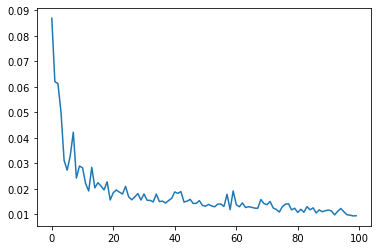

In [106]:
loss_per_epoch = model_NO.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [107]:

last_train_batch_NO = scaled_train_NO[-12:]

In [108]:
last_train_batch_NO = last_train_batch_NO.reshape((1, n_input, n_features))

In [109]:
model_NO.predict(last_train_batch_NO)

array([[0.40831062]], dtype=float32)

In [110]:
scaled_test_NO[0]

array([0.37321065])

In [111]:
test_predictions_NO = []

first_eval_batch_NO = scaled_train_NO[-n_input:]
current_batch_NO = first_eval_batch_NO.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred_NO = model_NO.predict(current_batch_NO)[0]
    
    # append the prediction into the array
    test_predictions_NO.append(current_pred_NO) 
    
    # use the prediction to update the batch and remove the first value
    current_batch_NO = np.append(current_batch_NO[:,1:,:],[[current_pred_NO]],axis=1)

In [112]:
test_predictions_NO

[array([0.40831062], dtype=float32),
 array([0.30390748], dtype=float32),
 array([0.20063186], dtype=float32),
 array([0.13409871], dtype=float32),
 array([0.10380238], dtype=float32),
 array([0.06764252], dtype=float32),
 array([0.0594634], dtype=float32),
 array([0.06946328], dtype=float32),
 array([0.28964528], dtype=float32),
 array([0.6551919], dtype=float32),
 array([0.6524873], dtype=float32),
 array([0.60098356], dtype=float32)]

In [113]:
scaled_test_NO

array([[ 0.37321065],
       [ 0.29284243],
       [ 0.26580245],
       [ 0.2362527 ],
       [ 0.1926981 ],
       [ 0.07041704],
       [ 0.0309328 ],
       [ 0.05200272],
       [-0.01240506],
       [ 0.31935823],
       [ 0.21610458],
       [ 0.2488667 ]])

In [114]:

true_predictions_NO = scaler.inverse_transform(test_predictions_NO)

In [115]:
true_predictions_NO

array([[ 87.48122649],
       [ 66.76100923],
       [ 46.26456186],
       [ 33.06015716],
       [ 27.04744086],
       [ 19.87102711],
       [ 18.24776979],
       [ 20.23237973],
       [ 63.93048253],
       [136.47816063],
       [135.94139208],
       [125.71978147]])

In [116]:
test_NO['Predictions'] = true_predictions_NO

In [117]:
test_NO

,NO,Predictions
From Date,,
2019-01-31,80.515161,87.481226
2019-02-28,64.565000,66.761009
2019-03-31,59.198548,46.264562
2019-04-30,53.334000,33.060157
2019-05-31,44.690000,27.047441
2019-06-30,20.421667,19.871027
2019-07-31,12.585484,18.247770
2019-08-31,16.767097,20.232380
2019-09-30,3.984500,63.930483


<AxesSubplot:xlabel='From Date'>

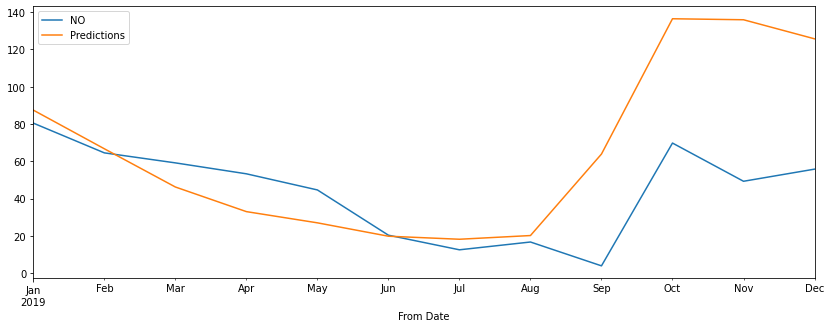

In [118]:
test_NO.plot(figsize=(14,5))


In [119]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_NO=sqrt(mean_squared_error(test_NO['NO'],test_NO['Predictions']))
print(rmse_NO)

42.23672777476719


# NO2

<AxesSubplot:xlabel='From Date'>

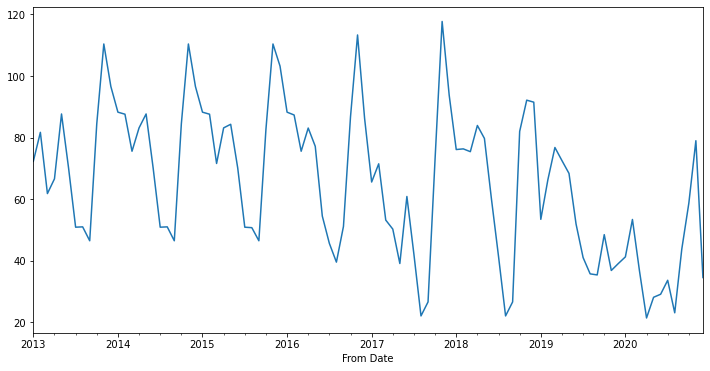

In [120]:
df['NO2'].plot(figsize=(12,6))

In [121]:
len(df['NO2'])

96

In [122]:
train_NO2 = pd.DataFrame(df['NO2'].iloc[:72])
test_NO2 = pd.DataFrame(df['NO2'].iloc[72:84])

In [123]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [124]:
scaler.fit(train_NO2)
scaled_train_NO2 = train_NO2
scaled_test_NO2 = test_NO2

In [125]:
scaled_train_NO2

,NO2
From Date,
2013-01-31,72.304839
2013-02-28,81.714286
2013-03-31,61.831935
2013-04-30,66.616500
2013-05-31,87.684516
...,...
2018-08-31,22.096129
2018-09-30,26.636000
2018-10-31,82.012581


In [126]:

from keras.preprocessing.sequence import TimeseriesGenerator

In [127]:
import numpy as np

In [128]:
scaler.fit(train_NO2)
scaled_train_NO2 = scaler.transform(train_NO2)
scaled_test_NO2 = scaler.transform(test_NO2)

In [129]:
n_input = 12
n_features = 1
generator = tf.keras.preprocessing.sequence.TimeseriesGenerator(scaled_train_NO2, scaled_train_NO2, length=n_input, batch_size=1)

In [130]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.52503166 0.62342609 0.41551668 0.46554879 0.68585669 0.50226152
 0.30132304 0.30245307 0.25521528 0.65216497 0.92351414 0.77907902]
Predict this y: 
 [[0.69193861]]


In [131]:
X.shape


(1, 12, 1)

In [132]:
# define model
model_NO2 = Sequential()
model_NO2.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
model_NO2.add(Dense(1))
model_NO2.compile(optimizer='adam', loss='mse')

In [133]:

# fit model
model_NO2.fit(generator,epochs=100)

Epoch 1/100
60/60 [==============================] - 2s 8ms/step - loss: 0.0900
Epoch 2/100
60/60 [==============================] - 1s 9ms/step - loss: 0.0720
Epoch 3/100
60/60 [==============================] - 1s 9ms/step - loss: 0.0589
Epoch 4/100
60/60 [==============================] - 0s 7ms/step - loss: 0.0695
Epoch 5/100
60/60 [==============================] - 0s 6ms/step - loss: 0.0598
Epoch 6/100
60/60 [==============================] - 0s 6ms/step - loss: 0.0545
Epoch 7/100
60/60 [==============================] - 0s 6ms/step - loss: 0.0422
Epoch 8/100
60/60 [==============================] - 0s 6ms/step - loss: 0.0356
Epoch 9/100
60/60 [==============================] - 0s 5ms/step - loss: 0.0233
Epoch 10/100
60/60 [==============================] - 0s 6ms/step - loss: 0.0284
Epoch 11/100
60/60 [==============================] - 0s 5ms/step - loss: 0.0284
Epoch 12/100
60/60 [==============================] - 0s 6ms/step - loss: 0.0216
Epoch 13/100
60/60 [=================

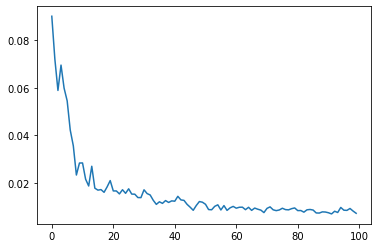

In [134]:
loss_per_epoch = model_NO2.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [135]:

last_train_batch_NO2 = scaled_train_NO2[-12:]

In [136]:
last_train_batch_NO2 = last_train_batch_NO2.reshape((1, n_input, n_features))

In [137]:
model_NO2.predict(last_train_batch_NO2)

array([[0.6298179]], dtype=float32)

In [138]:
scaled_test_NO2[0]

array([0.32801197])

In [139]:
test_predictions_NO2 = []

first_eval_batch_NO2 = scaled_train_NO2[-n_input:]
current_batch_NO2 = first_eval_batch_NO2.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred_NO2 = model_NO2.predict(current_batch_NO2)[0]
    
    # append the prediction into the array
    test_predictions_NO2.append(current_pred_NO2) 
    
    # use the prediction to update the batch and remove the first value
    current_batch_NO2 = np.append(current_batch_NO2[:,1:,:],[[current_pred_NO2]],axis=1)

In [140]:
test_predictions_NO2

[array([0.6298179], dtype=float32),
 array([0.57870066], dtype=float32),
 array([0.52951294], dtype=float32),
 array([0.5076822], dtype=float32),
 array([0.44399953], dtype=float32),
 array([0.37965196], dtype=float32),
 array([0.1797961], dtype=float32),
 array([-0.0164323], dtype=float32),
 array([-0.0056628], dtype=float32),
 array([0.36693645], dtype=float32),
 array([0.65596485], dtype=float32),
 array([0.68792146], dtype=float32)]

In [141]:
scaled_test_NO2

array([[0.32801197],
       [0.46221675],
       [0.57201387],
       [0.52745588],
       [0.48388849],
       [0.31207339],
       [0.19814972],
       [0.14281878],
       [0.13921596],
       [0.2759969 ],
       [0.15428099],
       [0.1779981 ]])

In [142]:

true_predictions_NO2 = scaler.inverse_transform(test_predictions_NO2)

In [143]:
true_predictions_NO2

array([[82.32553383],
       [77.43719864],
       [72.73338334],
       [70.64571272],
       [64.55574669],
       [58.40219733],
       [39.29000684],
       [20.52471028],
       [21.55459631],
       [57.18621394],
       [84.82596313],
       [87.88196991]])

In [144]:
test_NO2['Predictions'] = true_predictions_NO2

In [145]:
test_NO2

,NO2,Predictions
From Date,,
2019-01-31,53.463871,82.325534
2019-02-28,66.297857,77.437199
2019-03-31,76.797742,72.733383
2019-04-30,72.536667,70.645713
2019-05-31,68.370323,64.555747
2019-06-30,51.939667,58.402197
2019-07-31,41.045161,39.290007
2019-08-31,35.753871,20.524710
2019-09-30,35.409333,21.554596


<AxesSubplot:xlabel='From Date'>

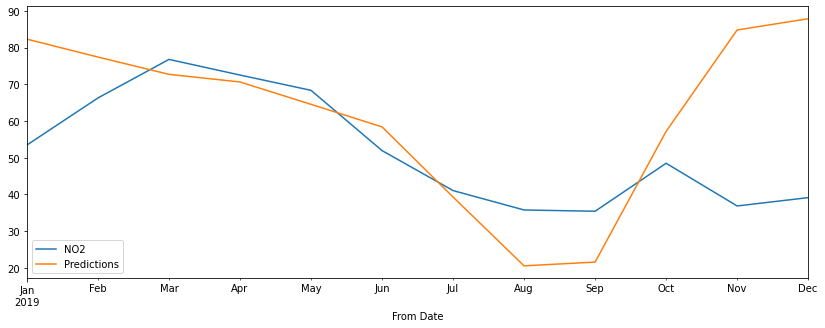

In [146]:
test_NO2.plot(figsize=(14,5))


In [148]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_NO2=sqrt(mean_squared_error(test_NO2['NO2'],test_NO2['Predictions']))
print(rmse_NO2)

22.759052077124217
